In [6]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [12]:
dataframe = pd.read_csv("tothemoon.csv")

print(dataframe)

     <TICKER> <PER>    <DATE>  <TIME>   <OPEN>   <HIGH>    <LOW>  <CLOSE>  \
0    US1.NVDA     D  03/01/22       0  298.150  307.040  298.005   301.16   
1    US1.NVDA     D  04/01/22       0  302.770  304.540  283.500   292.98   
2    US1.NVDA     D  05/01/22       0  289.210  294.000  275.350   276.00   
3    US1.NVDA     D  06/01/22       0  275.950  284.340  270.720   281.93   
4    US1.NVDA     D  07/01/22       0  281.700  284.080  270.650   272.33   
..        ...   ...       ...     ...      ...      ...      ...      ...   
242  US1.NVDA     D  19/12/22       0  165.790  166.080  161.490   162.57   
243  US1.NVDA     D  20/12/22       0  160.640  162.950  158.550   160.84   
244  US1.NVDA     D  21/12/22       0  161.145  166.260  161.145   165.02   
245  US1.NVDA     D  22/12/22       0  160.935  160.995  148.820   153.32   
246  US1.NVDA     D  23/12/22       0  151.900  153.350  148.870   152.05   

       <VOL>  
0     755639  
1    1022671  
2     917426  
3     878605  


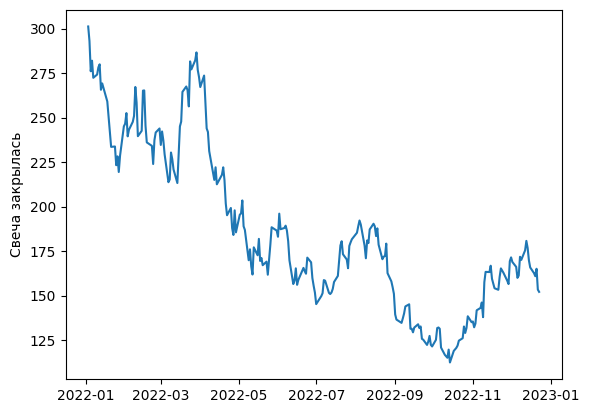

In [14]:
dates = pd.to_datetime(df["<DATE>"], format='%d/%m/%y').dt.date

plt.ylabel("Свеча закрылась")
plt.plot(dates, dataframe['<CLOSE>'])
plt.show()

In [15]:
def convert(data, window_size = 10):
    n = data.shape[0] - window_size
    X = np.array([data[i : i + window_size, :] for i in range(n)])
    Y = data[window_size:]
    return X, Y

In [28]:
scaler = MinMaxScaler()
close = scaler.fit_transform(dataframe["<CLOSE>"].values.reshape(-1, 1))

train_offset = 190
window_size = 10

close_train = close[:train_offset]
close_test = close[train_offset:]

X_train, Y_train = convert(close_train, window_size)
X_test, Y_test = convert(close_test, window_size)

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.GRU(units = 64),
    tf.keras.layers.Dense(units = 1)
])

model.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.MeanAbsoluteError()]
)

history = model.fit(X_train, Y_train, epochs = 311, batch_size = 16)

Epoch 1/311
12/12 [==============================] - 3s 4ms/step - loss: 0.0774 - mean_absolute_error: 0.2138
Epoch 2/311
12/12 [==============================] - 0s 4ms/step - loss: 0.0200 - mean_absolute_error: 0.1245
Epoch 3/311
12/12 [==============================] - 0s 4ms/step - loss: 0.0103 - mean_absolute_error: 0.0793
Epoch 4/311
12/12 [==============================] - 0s 4ms/step - loss: 0.0079 - mean_absolute_error: 0.0706
Epoch 5/311
12/12 [==============================] - 0s 4ms/step - loss: 0.0061 - mean_absolute_error: 0.0648
Epoch 6/311
12/12 [==============================] - 0s 4ms/step - loss: 0.0047 - mean_absolute_error: 0.0554
Epoch 7/311
12/12 [==============================] - 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0526
Epoch 8/311
12/12 [==============================] - 0s 4ms/step - loss: 0.0043 - mean_absolute_error: 0.0532
Epoch 9/311
12/12 [==============================] - 0s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0486
Epoch 10/3

In [30]:
predict = model.predict(X_test)
predict = scaler.inverse_transform(predict)
print(predict)

2/2 [==============================] - 0s 3ms/step
[[118.804886]
 [119.70706 ]
 [120.980446]
 [123.48817 ]
 [125.04628 ]
 [130.7786  ]
 [128.648   ]
 [130.76878 ]
 [136.71689 ]
 [134.62088 ]
 [134.78226 ]
 [132.13582 ]
 [133.56772 ]
 [140.11716 ]
 [142.00206 ]
 [144.91093 ]
 [138.11142 ]
 [154.70923 ]
 [161.63121 ]
 [161.89604 ]
 [165.59239 ]
 [159.15082 ]
 [156.56769 ]
 [154.05109 ]
 [152.97006 ]
 [159.31142 ]
 [164.05266 ]
 [161.99768 ]
 [157.96579 ]
 [156.22867 ]
 [167.82281 ]
 [170.26839 ]
 [167.9266  ]
 [165.60915 ]
 [159.87523 ]
 [160.82117 ]
 [170.51183 ]
 [169.079   ]
 [174.1522  ]
 [179.53668 ]
 [175.78137 ]
 [169.31203 ]
 [165.68027 ]
 [162.49826 ]
 [160.62503 ]
 [164.29582 ]
 [153.53687 ]]


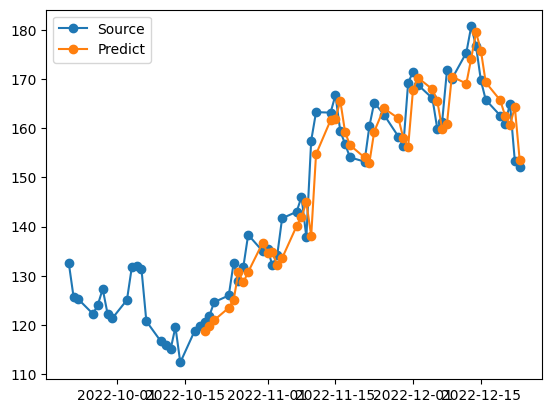

In [32]:
y_original = scaler.inverse_transform(Y_test)
start = train_offset - window_size

plt.plot(dates[start:], dataframe["<CLOSE>"].values[start:], '-o', label = 'Source')
plt.plot(dates[train_offset + window_size:], predict, '-o', label = 'Predict')
plt.legend()
plt.show()